In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Data_Cluster.xlsx')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31560 entries, 0 to 31559
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            31560 non-null  int64         
 1   created_at                    31560 non-null  object        
 2   contact_email                 31560 non-null  object        
 3   subtotal_price                31560 non-null  int64         
 4   total_price                   31560 non-null  int64         
 5   name_order                    31560 non-null  object        
 6   note_documento_tributario     31510 non-null  object        
 7   note_rut                      31509 non-null  object        
 8   note_giro                     5720 non-null   object        
 9   note_razon_social             5711 non-null   object        
 10  note_comuna                   6134 non-null   object        
 11  referring_site              

In [31]:
df.isnull().sum()

id                                  0
created_at                          0
contact_email                       0
subtotal_price                      0
total_price                         0
name_order                          0
note_documento_tributario          50
note_rut                           51
note_giro                       25840
note_razon_social               25849
note_comuna                     25426
referring_site                   9468
customer_id                         0
sku                                 1
product_name                        0
price                               0
quantity                            0
billing_address_first_name          2
billing_address_last_name           2
phone                           31560
billing_address_city                0
billing_address_province            0
Cliente único                       0
Nuevo / Recurrente                  0
Boleta/Factura                      0
Fecha corregida                     0
Código 1    

In [16]:
df[df.duplicated()]

,id,created_at,contact_email,subtotal_price,total_price,name_order,note_documento_tributario,note_rut,note_giro,note_razon_social,...,Mes de compra,Año de compra,Fecha primera compra,Mes 1era compra rec,Fecha última compra,Mes última compra rec,Meses entre compra,Frecuencia,Recencia,Rango Recencia
72,4875600000000,2022-08-28 20:20:53.000 -0400,voodoo.psyko@hotmail.com,33990,37386,ST#21345,Boleta,18052730-3,NaN,NaN,...,8,2022,28-ago,8,28-ago,8,0,Nuevo,-223,De 0 a 30
73,4875600000000,2022-08-28 20:20:53.000 -0400,voodoo.psyko@hotmail.com,33990,37386,ST#21345,Boleta,18052730-3,NaN,NaN,...,8,2022,28-ago,8,28-ago,8,0,Nuevo,-223,De 0 a 30
74,4875600000000,2022-08-28 20:20:53.000 -0400,voodoo.psyko@hotmail.com,33990,37386,ST#21345,Boleta,18052730-3,NaN,NaN,...,8,2022,28-ago,8,28-ago,8,0,Nuevo,-223,De 0 a 30
75,4875600000000,2022-08-28 20:20:53.000 -0400,voodoo.psyko@hotmail.com,33990,37386,ST#21345,Boleta,18052730-3,NaN,NaN,...,8,2022,28-ago,8,28-ago,8,0,Nuevo,-223,De 0 a 30
76,4875600000000,2022-08-28 20:20:53.000 -0400,voodoo.psyko@hotmail.com,33990,37386,ST#21345,Boleta,18052730-3,NaN,NaN,...,8,2022,28-ago,8,28-ago,8,0,Nuevo,-223,De 0 a 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28092,4996170000000,2022-11-26 20:52:52.000 -0300,paoglabbe@gmail.com,96550,96550,ST#28486,Boleta,13709836-9,NaN,NaN,...,11,2022,26-nov,11,26-nov,11,0,Nuevo,-313,De 0 a 30
28185,4954030000000,2022-11-02 10:59:08.000 -0300,kathleensioux@gmail.com,103657,107053,ST#27270,Boleta,24902750-2,NaN,NaN,...,11,2022,02-nov,11,02-nov,11,0,Nuevo,-289,De 0 a 30
28361,4957090000000,2022-11-04 22:36:06.000 -0300,rebeca_keka@yahoo.com,173920,179157,ST#27400,Boleta,6378977-1,NaN,NaN,...,11,2022,04-nov,11,04-nov,11,0,Nuevo,-291,De 0 a 30
29525,4993780000000,2022-11-25 21:11:09.000 -0300,karlaalzola@gmail.com,198290,202434,ST#28276,Boleta,10385203-K,NaN,NaN,...,11,2022,25-nov,11,25-nov,11,0,Nuevo,-312,De 0 a 30


In [19]:
df.columns

Index(['subtotal_price', 'total_price', 'referring_site', 'Cliente único',
       'Nuevo / Recurrente', 'Boleta/Factura', 'N° pedidos',
       'Monto compra por cliente', 'Monto compra (Alto / Bajo )',
       'Cantidad productos x cliente', 'Cantidad ( Alta o Baja )',
       'SKU Diferentes', 'Clasificación SKU', 'Alta categoría ( SI / NO )',
       'Rubro clasificado', 'Día compra', 'Mes de compra', 'Año de compra',
       'Fecha primera compra', 'Mes 1era compra rec', 'Fecha última compra',
       'Mes última compra rec', 'Meses entre compra', 'Frecuencia', 'Recencia',
       'Rango Recencia'],
      dtype='object')

In [32]:
# Drop columns
print(df.shape)
df = df.loc[df['Cliente único'] == 0]
drop_columns = [
    'id', 
    'created_at',
    'contact_email', 
    'name_order', 
    'note_documento_tributario',
    'note_rut', 
    'note_giro',
    'note_razon_social',
    'note_comuna',
    'customer_id',
    'referring_site',
    'sku',
    'product_name',
    'price',
    'quantity', 
    'billing_address_first_name', 
    'billing_address_last_name',
    'phone',
    'billing_address_city',
    'billing_address_province',
    'Código 1',
    'Fecha corregida',
    'Día compra',
    'Mes de compra',
    'Año de compra',
    'Fecha primera compra',
    'Mes 1era compra rec',
    'Fecha última compra',
    'Mes última compra rec'
]
df.drop(drop_columns, axis=1, inplace=True)
print(df.shape)
# drop duplicates
df.drop_duplicates(inplace=True)
print(df.shape)
df.head()

(31560, 47)
(12172, 18)
(11351, 18)


,subtotal_price,total_price,Cliente único,Nuevo / Recurrente,Boleta/Factura,N° pedidos,Monto compra por cliente,Monto compra (Alto / Bajo ),Cantidad productos x cliente,Cantidad ( Alta o Baja ),SKU Diferentes,Clasificación SKU,Alta categoría ( SI / NO ),Rubro clasificado,Meses entre compra,Frecuencia,Recencia,Rango Recencia
0,48170,53312,0,Nuevo,Boleta,1,53312,Bajo,3,Baja,2,Bajo,NO,-,0,Nuevo,-245,De 0 a 30
2,45480,48876,0,Nuevo,Boleta,1,48876,Bajo,2,Baja,2,Bajo,NO,-,0,Nuevo,-198,De 0 a 30
4,35690,39935,0,Recurrente,Boleta,3,39935,Bajo,6,Baja,3,Bajo,NO,-,0,Más de 1 compra el mismo mes,-139,De 0 a 30
8,10390,13786,0,Nuevo,Boleta,1,13786,Bajo,1,Baja,1,Bajo,NO,-,0,Nuevo,-135,De 0 a 30
9,16770,20166,0,Nuevo,Boleta,1,20166,Bajo,3,Baja,1,Bajo,NO,-,0,Nuevo,-218,De 0 a 30


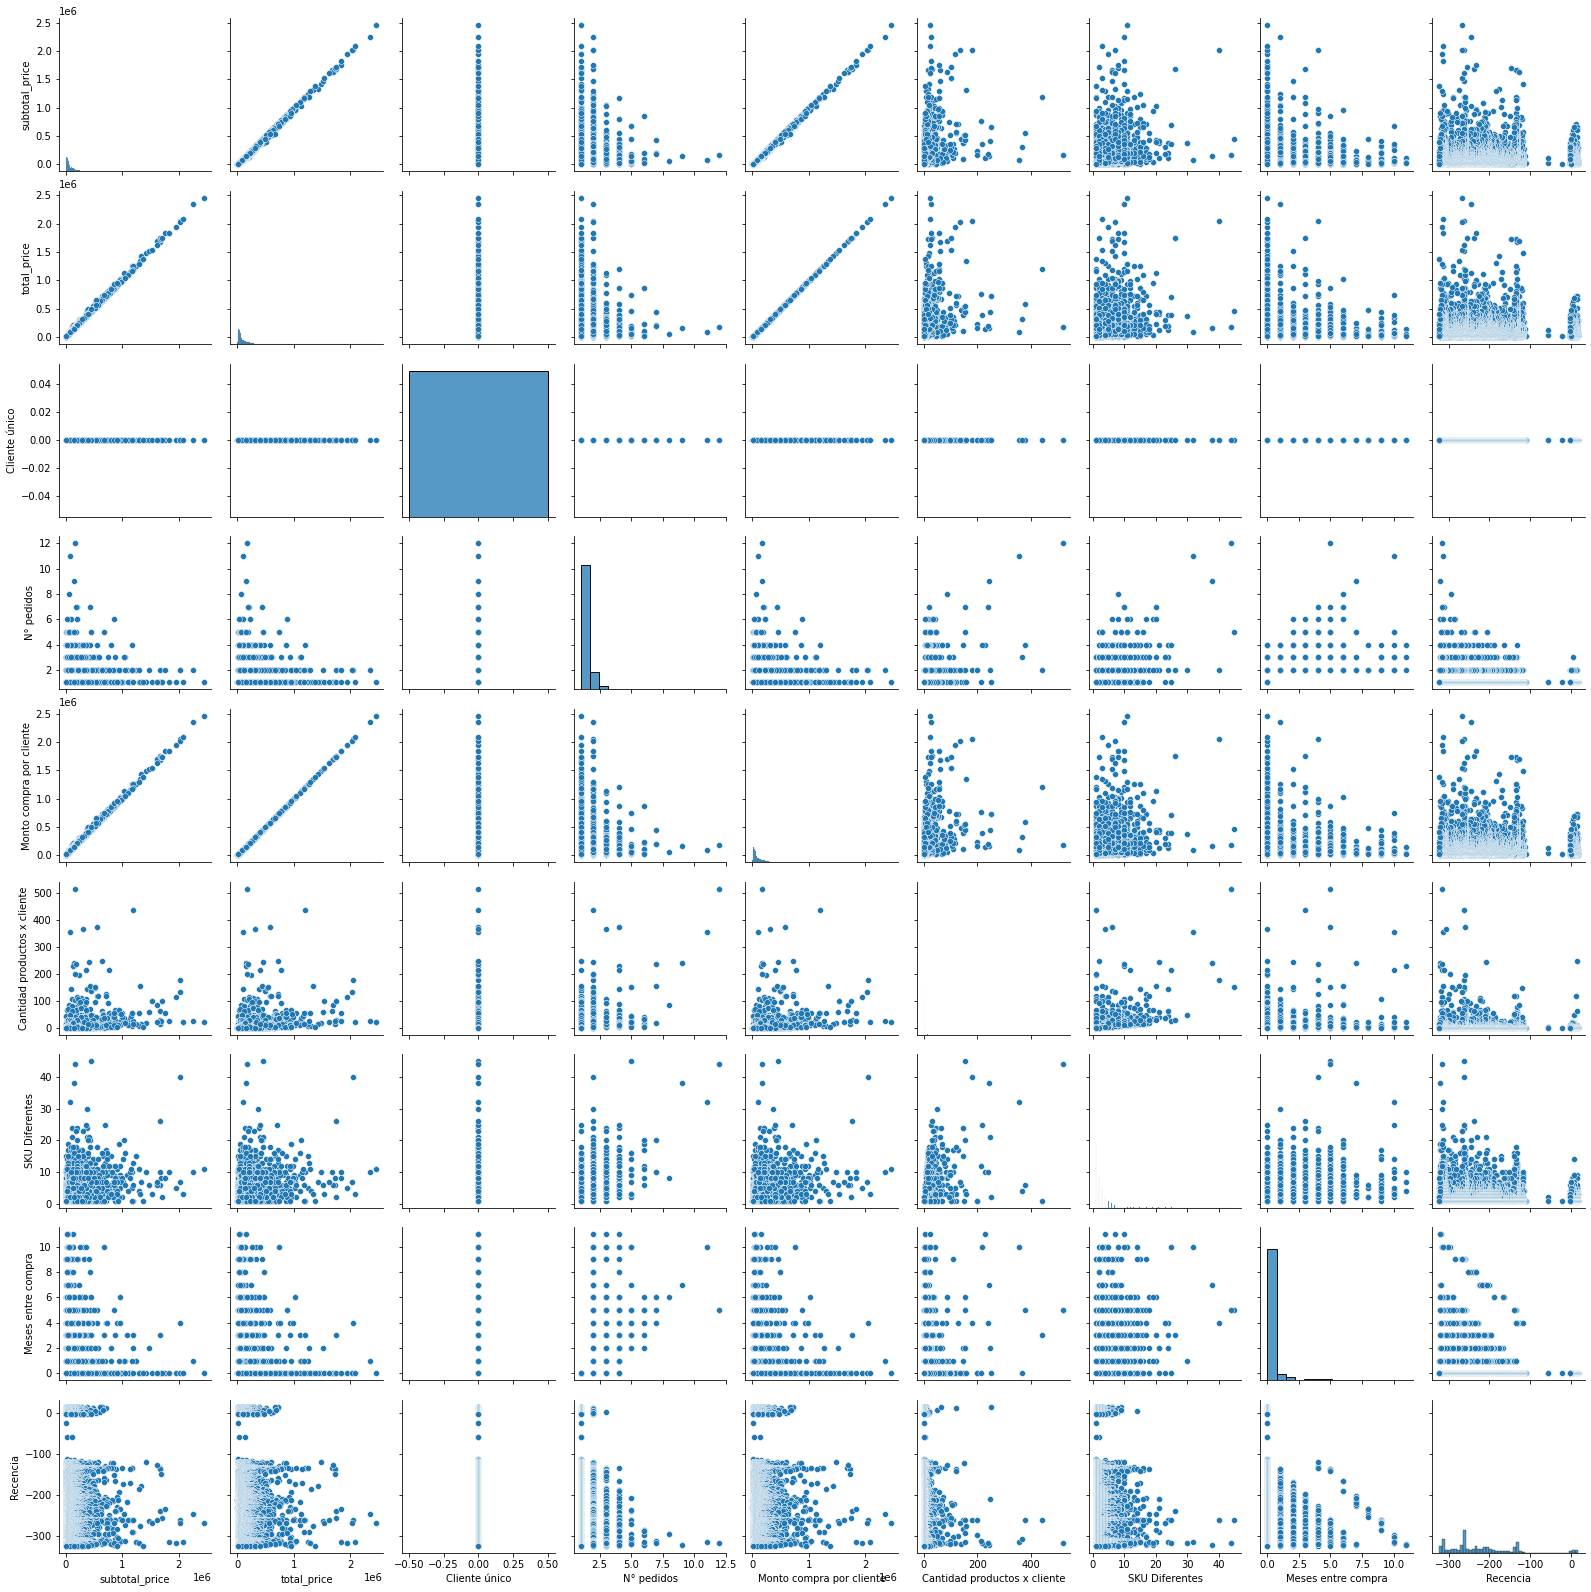

In [33]:
sns.pairplot(df)

In [34]:
df.dtypes

subtotal_price                   int64
total_price                      int64
Cliente único                    int64
Nuevo / Recurrente              object
Boleta/Factura                  object
N° pedidos                       int64
Monto compra por cliente         int64
Monto compra (Alto / Bajo )     object
Cantidad productos x cliente     int64
Cantidad ( Alta o Baja )        object
SKU Diferentes                   int64
Clasificación SKU               object
Alta categoría ( SI / NO )      object
Rubro clasificado               object
Meses entre compra               int64
Frecuencia                      object
Recencia                         int64
Rango Recencia                  object
dtype: object

In [41]:
cat_vars = ['Nuevo / Recurrente',
           'Boleta/Factura', 'Monto compra (Alto / Bajo )',
           'Cantidad ( Alta o Baja )', 'Clasificación SKU',
           'Alta categoría ( SI / NO )','Rubro clasificado',
           'Meses entre compra','Frecuencia','Rango Recencia']
df2 = df.copy()
#df2[cat_vars] = df2[cat_vars].astype(str)
df2 = pd.get_dummies(df2,columns=cat_vars,drop_first=True)
#dummies = pd.get_dummies(df2)
#drop
#df2.drop(cat_vars, axis=1, inplace=True)
#df2 = df2.join(dummies)
df2.head()

,subtotal_price,total_price,Cliente único,N° pedidos,Monto compra por cliente,Cantidad productos x cliente,SKU Diferentes,Recencia,Nuevo / Recurrente_Recurrente,Boleta/Factura_Canceladas,...,Frecuencia_3,Frecuencia_3.3333333333333335,Frecuencia_3.5,Frecuencia_3.6666666666666665,Frecuencia_4,Frecuencia_4.5,Frecuencia_5,Frecuencia_5.5,Frecuencia_Más de 1 compra el mismo mes,Frecuencia_Nuevo
0,48170,53312,0,1,53312,3,2,-245,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45480,48876,0,1,48876,2,2,-198,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35690,39935,0,3,39935,6,3,-139,1,0,...,0,0,0,0,0,0,0,0,1,0
8,10390,13786,0,1,13786,1,1,-135,0,0,...,0,0,0,0,0,0,0,0,0,1
9,16770,20166,0,1,20166,3,1,-218,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
from sklearn.decomposition import PCA

# One hot encoding
pca = PCA(n_components=2)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_2D = pca.fit_transform(df2)
X_2D = pd.DataFrame(X_2D, columns=["dimension 1", "dimension 2"])
X_2D

,dimension 1,dimension 2
0,-1.031000e+05,1.856401
1,-1.097915e+05,-1345.614306
2,-1.257588e+05,-465.789167
3,-1.705650e+05,-635.765647
4,-1.595153e+05,-764.952234
...,...,...
11346,4.955551e+05,417.292677
11347,2.192254e+06,-31003.152840
11348,-4.928897e+04,-1525.729448
11349,6.283513e+04,-2544.472521


No handles with labels found to put in legend.


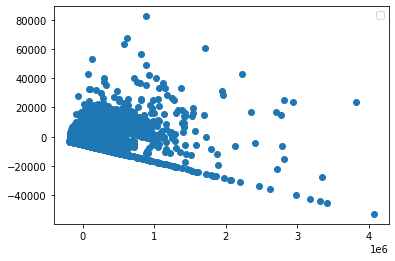

In [46]:
import matplotlib.pyplot as plt


plt.scatter(X_2D["dimension 1"], X_2D["dimension 2"])

plt.legend()
plt.show()

In [47]:
pca.explained_variance_ratio_

array([9.99622506e-01, 3.77404959e-04])

[Text(0.5, 1.0, 'Shopify T-SNE projection')]

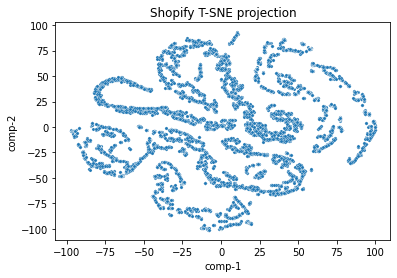

In [52]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

# Ojo, aquí no vamos a estandarizar
X_2D_TSNE = tsne.fit_transform(df2)

df = pd.DataFrame()
df["comp-1"] = X_2D_TSNE[:,0]
df["comp-2"] = X_2D_TSNE[:,1]


[Text(0.5, 1.0, 'Shopify T-SNE projection')]

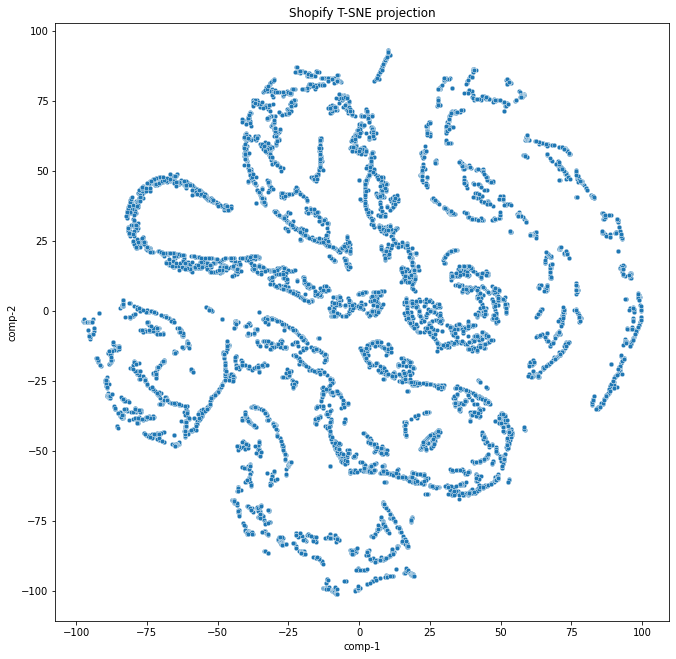

In [60]:
plt.figure(figsize=(11,11))
sns.scatterplot(x="comp-1", y="comp-2",
                palette=sns.color_palette("hls", 3),
                data=df,s=20).set(title="Shopify T-SNE projection")